In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample

In [2]:
# load the dataset 

data = pd.read_csv("Insurance claims data.csv")

In [3]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [7]:
data.shape

(58592, 41)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [5]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

- ### data visualization : 
we will perform exploratory data analysis to visualize and understand the distributions, relationships, and patterns in the data. and we will examine the distribution of the target variable and key features. Let’s start with visualizing the distribution of the claim_status to understand the class balance

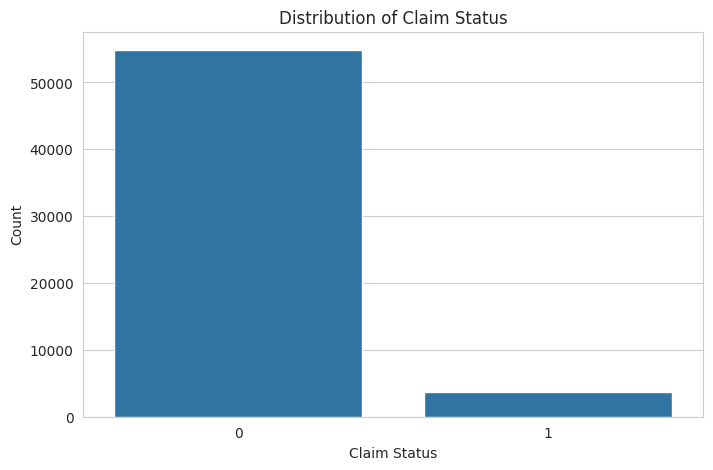

In [10]:
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0).

- we will perform some analysis on both numerical and categorical features to understand their distributions and relationships with the target variable 

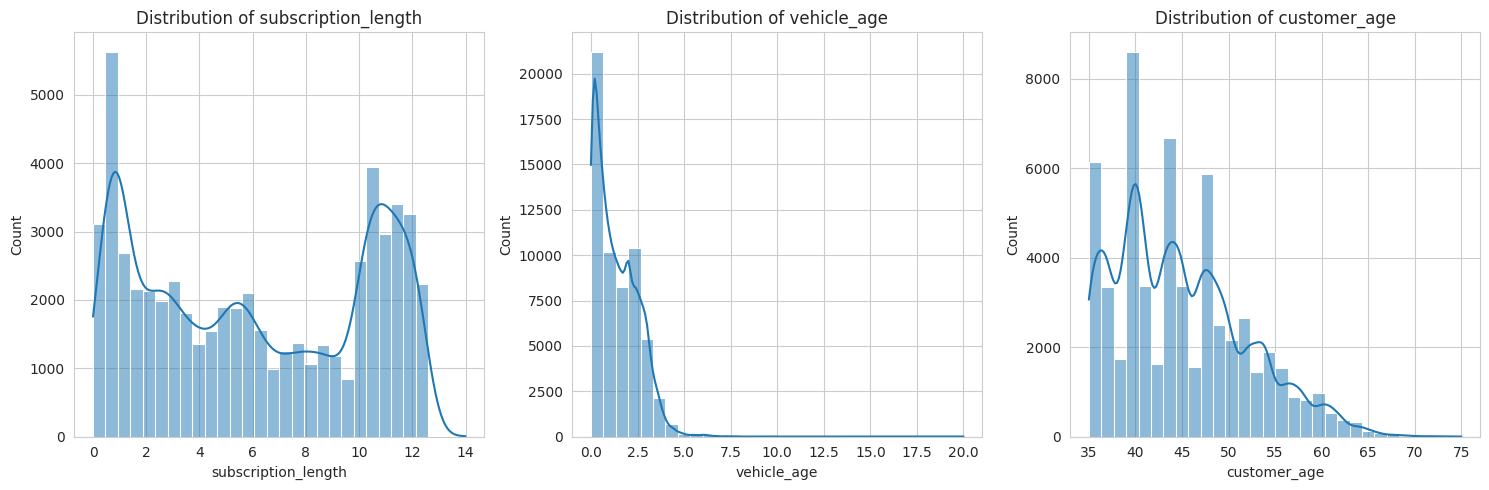

In [12]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

 **some analysis**

- subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.
- vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.
- customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

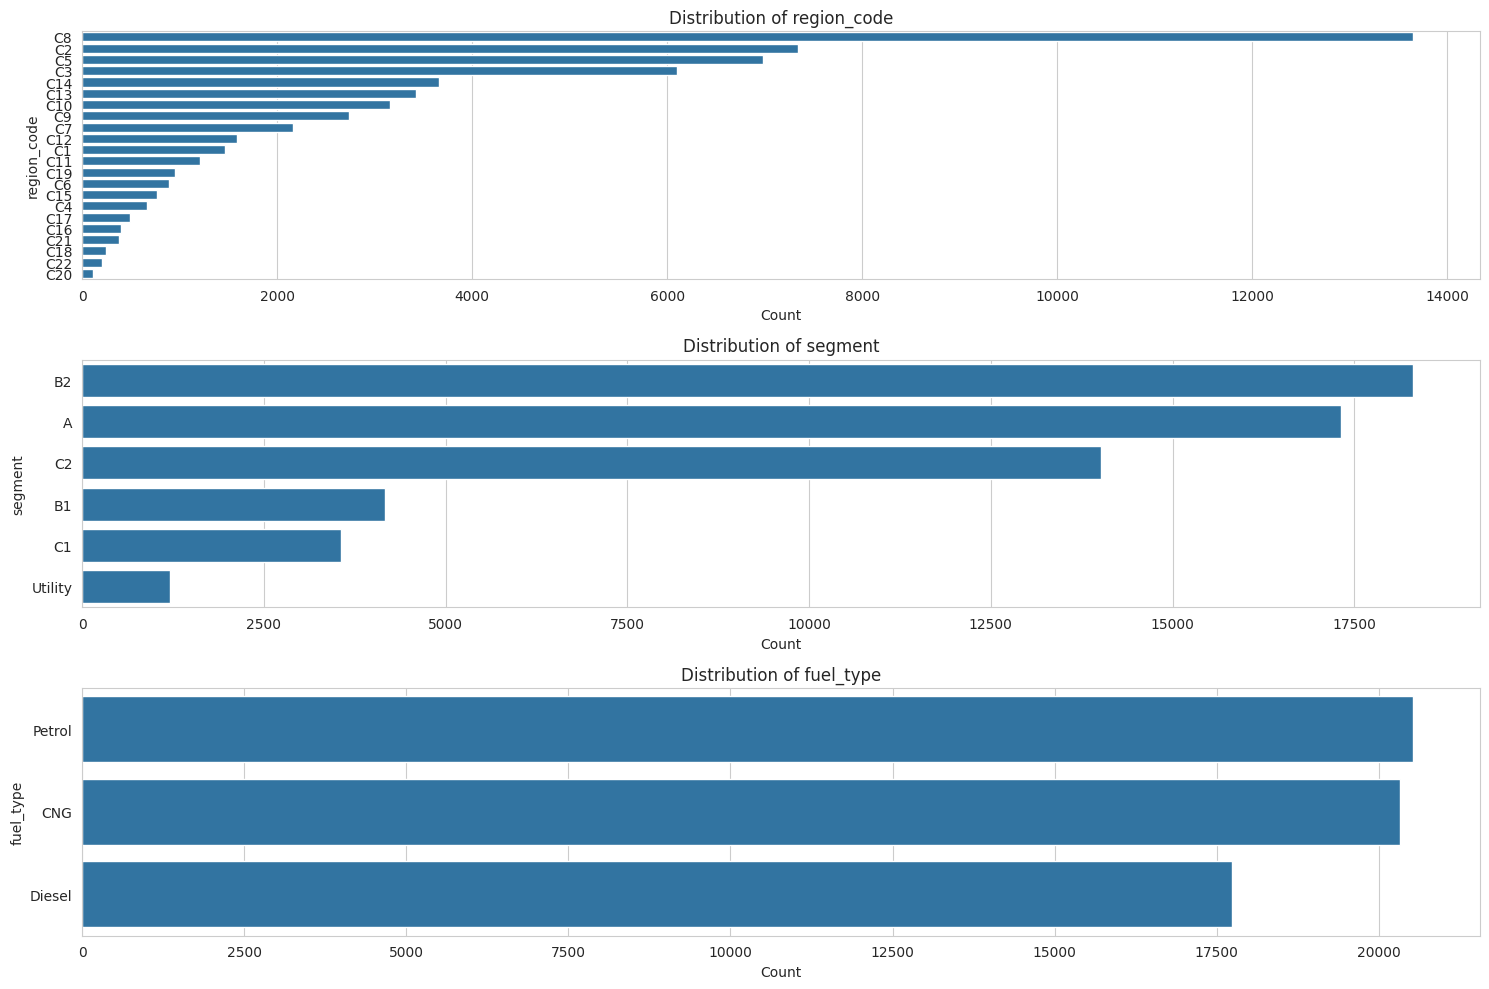

In [13]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

- For ‘region_code,’ there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. In the ‘segment’ distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common. Lastly, ‘fuel_type’ shows three categories: ‘Petrol’ has the highest count than CNG and Diesel.

#### handling class imbalance - using oversampling

In [17]:
# separate majority and minority classes 

majority = data[data.claim_status==0]
minority = data[data.claim_status==1]

# oversample the minority class 
minority_oversampled = resample(minority,replace=True,n_samples=len(majority),random_state=42)

#combine the majority and the oversampled monority class 
oversampled_data = pd.concat([majority,minority_oversampled])

#check the distribution of undersampled and oversampled datasets 
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

 Now, let’s have a look at some key variables to see what the balanced data looks like:

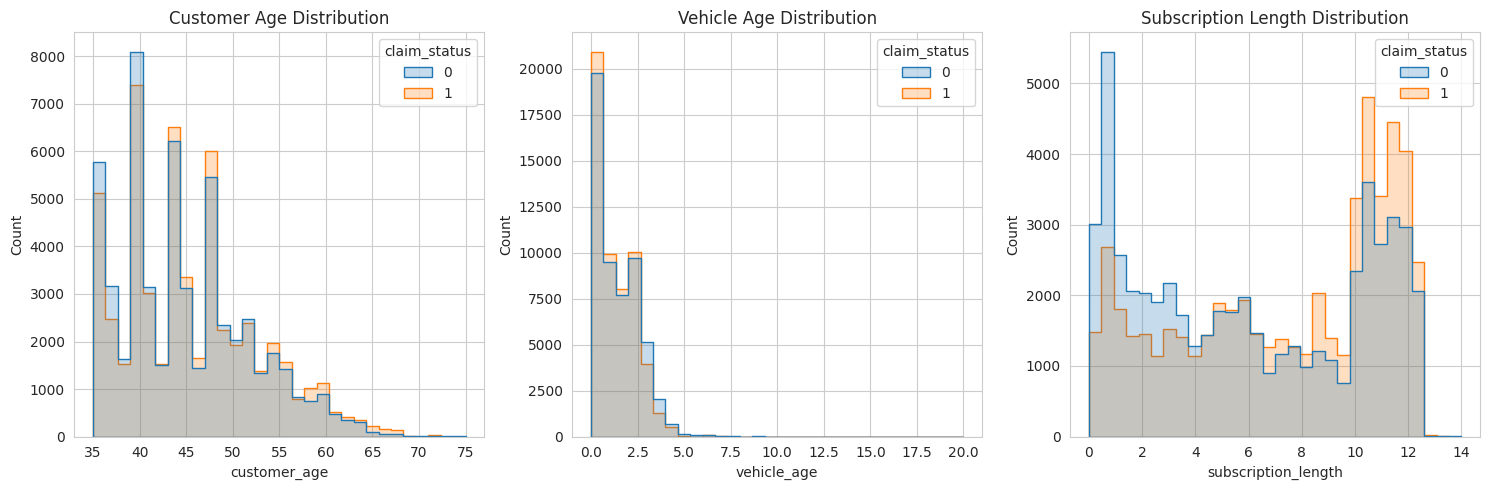

In [18]:

# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()